# Loading Libraries

In [1]:
#import pandas as pd 
import pandas as pd

#import matplotlib. pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
import seaborn as sns

#import numpy as np
import numpy as np

In [2]:
housing=pd.read_csv('archive/housing.csv')

In [3]:
#import scatter_matrix from pandas

from pandas.plotting import scatter_matrix

# Exploratory Data Analysis-EDA

In [4]:
housing.shape

(20640, 10)

In [5]:
#counting numerical and categorical values
housing.dtypes.value_counts()

#here observe that float is numerical data type and object is categorical

float64    9
object     1
dtype: int64

In [6]:
housing.info()
#this provides non-null info for every column along with dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#finding value_counts() for a particular column
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
#extracting summary stats for that data

housing.describe().T

#based on this we can decide which vars to focus on and which one to drop

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


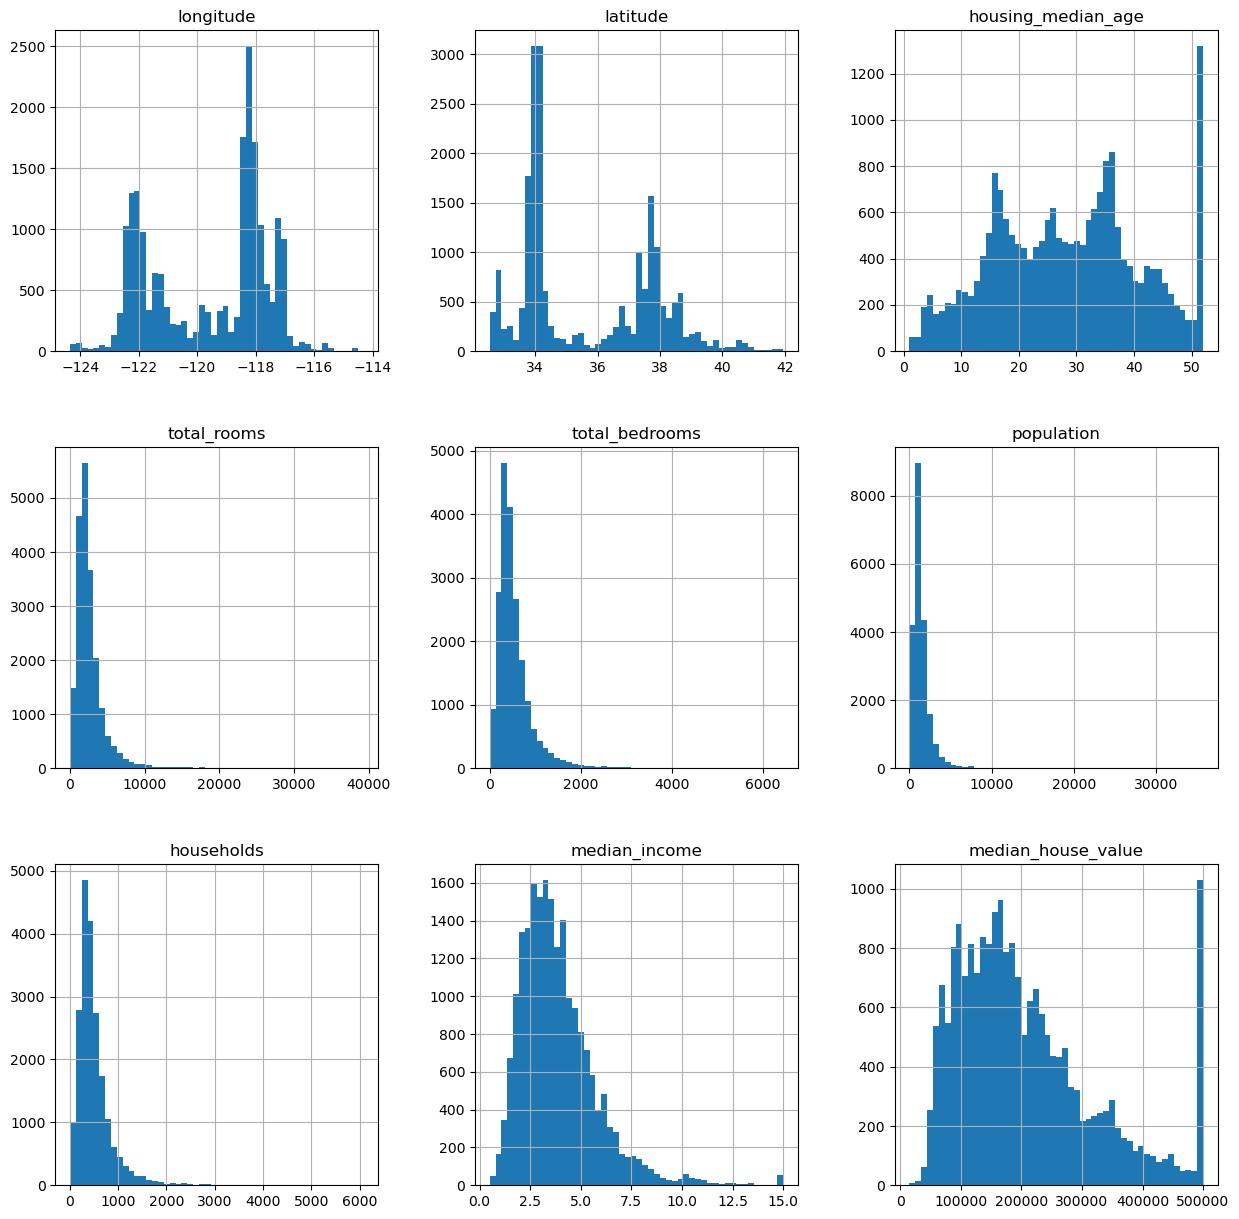

'housing.hist(bins=5,figsize=(12,15))\nplt.show()'

In [9]:
#plotting histogram for a column-done for a numerical column
#BINS specifies the number of intervals or "bins" into which the range of data values will be divided on the x-axis.
#it represents how many blue bars are there 

housing.hist(bins=50,figsize=(15,15))
plt.show()
#check this
'''housing.hist(bins=5,figsize=(12,15))
plt.show()'''

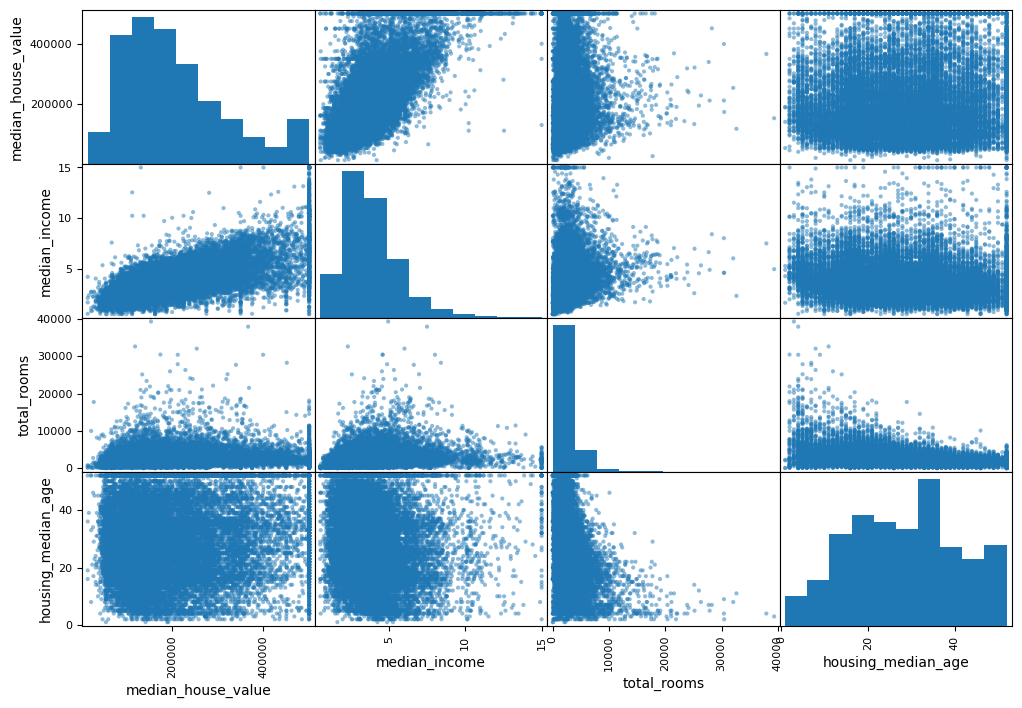

In [10]:
#plotting scatter matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

In [11]:
#how many rows having blank values
housing[housing.isnull().any(axis=1)].shape

(207, 10)

In [12]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

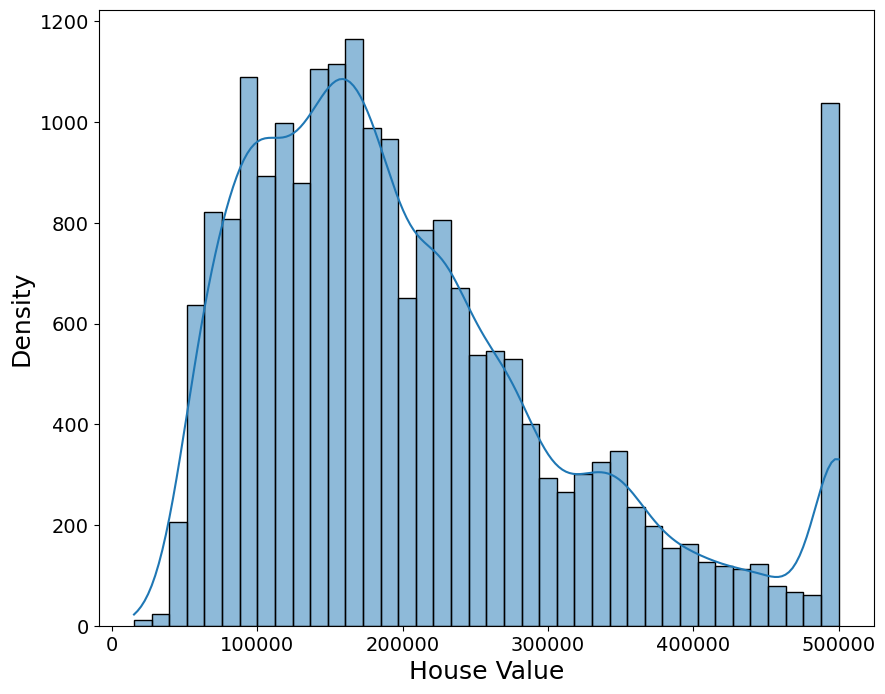

In [13]:
fig_missing,axes=plt.subplots(1,1,figsize=(10,8))

#plot frequency plot/histogram
_=sns.histplot(x='median_house_value',kde=True,data=housing,ax=axes,bins=40);
_=axes.set(xlabel='House Value',ylabel='Density');
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y',labelsize=14);
axes.tick_params('x',labelsize=14);

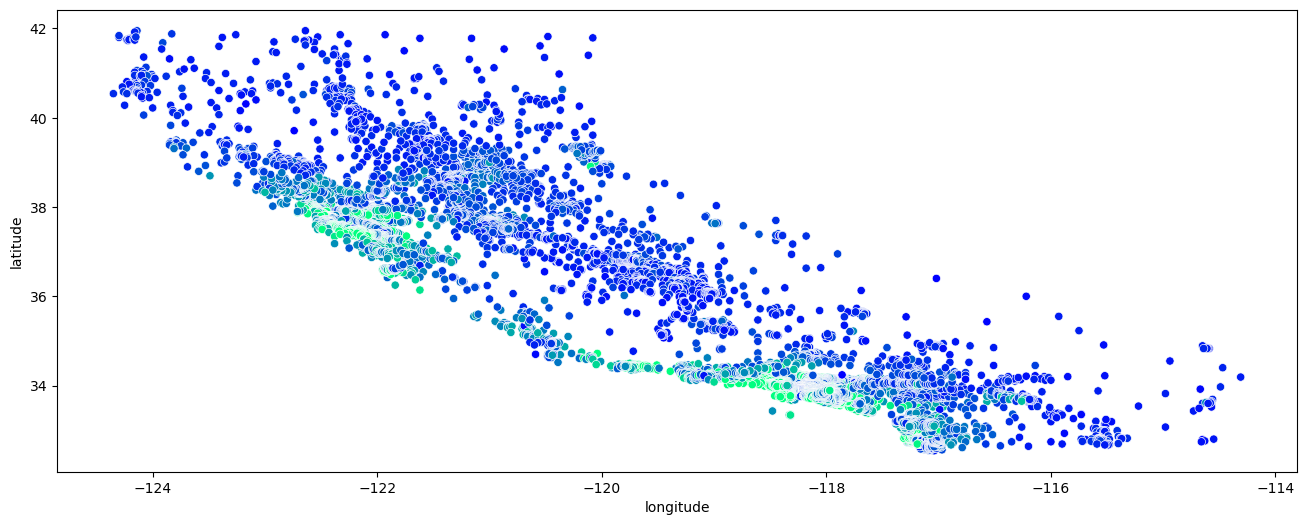

In [14]:
#finding the relation between house value and latitude/longitude using scatter plots
plt.figure(figsize=(16,6))
fig=sns.scatterplot(x=housing.longitude,y=housing.latitude,hue=housing['median_house_value'],legend=False,palette='winter');

In [15]:
'''House prices increase as the ocean distance decreases. 
A house with ocean view is more expensive.'''

'House prices increase as the ocean distance decreases. \nA house with ocean view is more expensive.'

In [16]:
#sort the data by population
housing.sort_values(by='population',ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
18210,-122.06,37.39,26.0,18.0,4.0,8.0,4.0,3.7500,375000.0,NEAR BAY
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,INLAND


In [17]:
#An outlier is a data point that significantly deviates from the rest of the data in a dataset.
#removing the outliers
housing=housing.drop(labels=[15360,9880])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4300\1516298361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(),annot=True)


<Axes: >

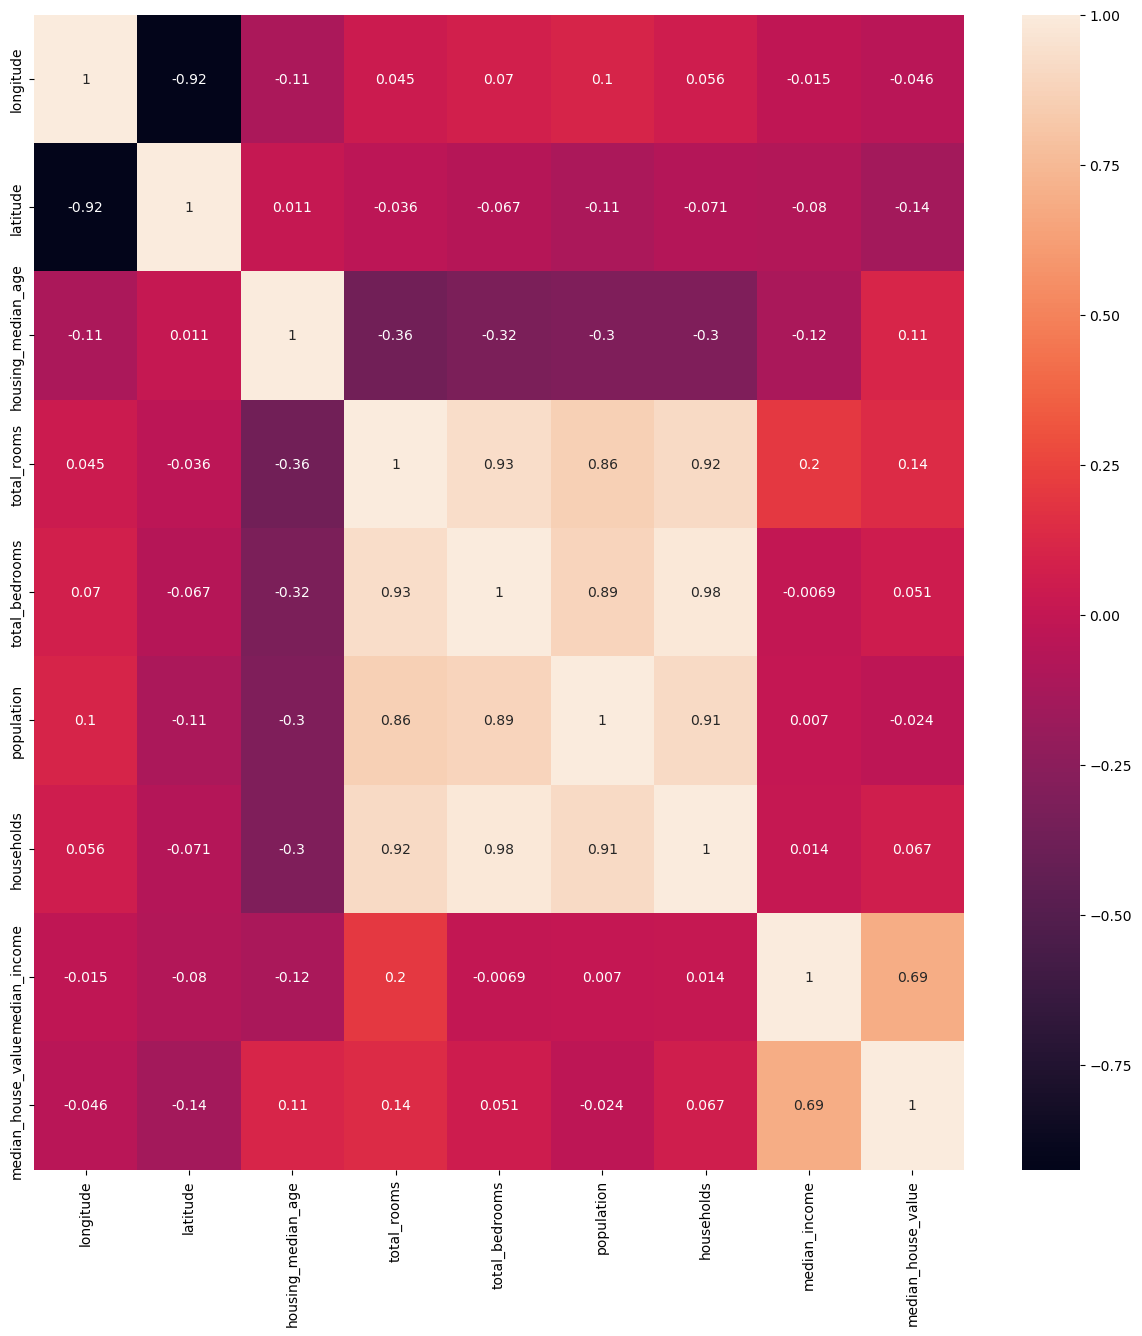

In [18]:
#to find the co relation of the variables in the dataset
plt.figure(figsize=(15,15))
sns.heatmap(housing.corr(),annot=True)
#annot showcases the correlation numbers

In [19]:
#if it is lighter color then higher correlation 
#the more darker lesser correlation

#one can also observe the numbers

# Feature Enineering

In [20]:
#feature engineering means manipulating the data
#feature-columns

In [21]:
#adding new columns
housing['avgrooms']=housing['total_rooms']/housing['households']
housing['avBedgrooms'] = housing['total_bedrooms']/housing['households']
housing['pop_per_household']=housing['population']/housing['households']

In [22]:
#filling null values with median
housing['total_bedrooms']=housing['total_bedrooms'].fillna(housing['total_bedrooms'].median)

In [23]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
# making columns of categorical data, we can use dummy data
dummies=pd.get_dummies(housing.ocean_proximity,drop_first=True)
#drop_firt=True, here makes 4 columns out of 5 categories
#so if all values of 4 categories are 0, then it belong to dropped category

In [25]:
dummies.shape

(20638, 4)

In [26]:
merged_df=pd.concat([housing,dummies],axis='columns')

In [27]:
merged_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgrooms,avBedgrooms,pop_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,1,0


In [28]:
#checking the correlation again
merged_df.corr()['median_house_value'].sort_values(ascending=False)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4300\1850912473.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688059
NEAR BAY              0.160265
avgrooms              0.151949
NEAR OCEAN            0.141841
total_rooms           0.135955
housing_median_age    0.105547
households            0.067277
ISLAND                0.023416
population           -0.023716
pop_per_household    -0.023719
longitude            -0.045979
avBedgrooms          -0.046749
latitude             -0.144184
INLAND               -0.484928
Name: median_house_value, dtype: float64

In [29]:
merged_df=merged_df.drop(['ocean_proximity','pop_per_household','avBedgrooms','total_rooms'],axis='columns')

In [30]:
merged_df.head()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value,avgrooms,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0,0,1,0
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0,0,1,0
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0,0,1,0
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0,0,1,0
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0,0,1,0


# Model Building

In [31]:
#sklearn is a ml api in python
from sklearn.model_selection import train_test_split

In [32]:
#split data into test and train sets
X=merged_df.drop(['median_house_value'],axis=1)#independent vars
y=merged_df['median_house_value']#dependent var#importing the linear regression model
from sklearn.linear_model import LinearRegression

In [33]:
#split data into test and train sets
X=merged_df.drop(['median_house_value'],axis=1)#independent vars
y=merged_df['median_house_value']#dependent var

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16510 entries, 16911 to 15797
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16510 non-null  float64
 1   latitude            16510 non-null  float64
 2   housing_median_age  16510 non-null  float64
 3   total_bedrooms      16510 non-null  object 
 4   population          16510 non-null  float64
 5   households          16510 non-null  float64
 6   median_income       16510 non-null  float64
 7   avgrooms            16510 non-null  float64
 8   INLAND              16510 non-null  uint8  
 9   ISLAND              16510 non-null  uint8  
 10  NEAR BAY            16510 non-null  uint8  
 11  NEAR OCEAN          16510 non-null  uint8  
dtypes: float64(7), object(1), uint8(4)
memory usage: 1.2+ MB


In [37]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 16510 entries, 16911 to 15797
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16510 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [63]:
# Convert 'total_bedrooms' column to numeric
X_train['total_bedrooms'] = pd.to_numeric(X_train['total_bedrooms'], errors='coerce')
X_test['total_bedrooms'] = pd.to_numeric(X_test['total_bedrooms'], errors='coerce')

In [64]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 12413 to 14160
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_bedrooms      4013 non-null   float64
 4   population          4128 non-null   float64
 5   households          4128 non-null   float64
 6   median_income       4128 non-null   float64
 7   avgrooms            4128 non-null   float64
 8   INLAND              4128 non-null   uint8  
 9   ISLAND              4128 non-null   uint8  
 10  NEAR BAY            4128 non-null   uint8  
 11  NEAR OCEAN          4128 non-null   uint8  
dtypes: float64(8), uint8(4)
memory usage: 306.4 KB


In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 12413 to 14160
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_bedrooms      4013 non-null   float64
 4   population          4128 non-null   float64
 5   households          4128 non-null   float64
 6   median_income       4128 non-null   float64
 7   avgrooms            4128 non-null   float64
 8   INLAND              4128 non-null   uint8  
 9   ISLAND              4128 non-null   uint8  
 10  NEAR BAY            4128 non-null   uint8  
 11  NEAR OCEAN          4128 non-null   uint8  
dtypes: float64(8), uint8(4)
memory usage: 306.4 KB


In [66]:
#fit means learning from data that is passed as parameters
regr=LinearRegression()

In [ ]:
'''Imputation: Imputation involves filling in missing values with some estimated values. 
You can use the SimpleImputer class from scikit-learn to handle this. 
It can fill missing values with the mean, median, or any other value that you choose based on the context of your data.'''
#imputation is done as fit doest take NaN-missing values

In [68]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can also use 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [69]:
regr.fit(X_train_imputed, y_train)

LinearRegression()

In [70]:
regr.score(X_test_imputed,y_test)

0.6528036465118376

In [71]:
regr.score(X_train_imputed,y_train)

0.6475959454531706

In [ ]:
#when train score is less than test data then it is a case of underfitting

In [74]:
prediction=regr.predict(X_test_imputed)

In [76]:
pd.DataFrame({'Actual':y_test,'Predicted':prediction})

,Actual,Predicted
12413,69400.0,88653.432398
3024,45800.0,145158.450175
9547,103800.0,101267.986892
16534,106300.0,108588.773153
12592,181400.0,186045.673730
...,...,...
5508,303900.0,264202.916837
13507,93200.0,87088.095629
2144,72300.0,125029.321595
3665,151500.0,178334.778518


# Using Ridge Lasso model

In [77]:
#regen lassonis useful when there is multi collinearity in the data
''' regularization techniques used to prevent overfitting in linear regression 
models by adding a penalty term to the loss function.'''

In [79]:
from sklearn.linear_model import Ridge

In [80]:
rg=Ridge(alpha=0.01)

In [81]:
rg.fit(X_train_imputed,y_train)

Ridge(alpha=0.01)

In [83]:
rg.score(X_test_imputed,y_test)

0.6528026225209884

In [88]:
rg1=Ridge(alpha=0.03)
rg1.fit(X_train_imputed,y_train)
rg1.score(X_test_imputed,y_test)

0.6528005777635948

In [84]:
#using lasso model
from sklearn.linear_model import Lasso

In [85]:
ls=Lasso(alpha=0.01)

In [86]:
ls.fit(X_train_imputed,y_train)

Lasso(alpha=0.01)

In [87]:
ls.score(X_test_imputed,y_test)

0.6528035411956493